In [17]:
import numpy
import LibsControl
import matplotlib.pyplot as plt


def robot_step(x, y, theta, vl, vr, r, l, dt):

    dx      = (r/2)*(vr + vl)*numpy.cos(theta)
    dy      = (r/2)*(vr + vl)*numpy.sin(theta)
    dtheta  = (r/l)*(vr - vl)

    x_new       = x     + dx*dt
    y_new       = y     + dy*dt
    theta_new   = theta + dtheta*dt

    return x_new, y_new, theta_new


vl          = 0.0
vr          = 0.0

x           = 0.0
y           = 0.0
theta       = 0.0

r = 0.1
l = 0.3

dt          = 1.0/20.0


vl_batch    = []
vr_batch    = []
x_batch     = []
y_batch     = []
theta_batch = []


steps = 10000
for i in range(steps):

    if i%500 == 0:
        vl = numpy.random.randint(0, 3) - 1
        vr = numpy.random.randint(0, 3) - 1

    x_new, y_new, theta_new = robot_step(x, y, theta, vl, vr, r, l, dt)

    x       = x_new
    y       = y_new
    theta   = theta_new

    vl_batch.append(vl)
    vr_batch.append(vr)

    x_batch.append(x_new)
    y_batch.append(y_new)
    theta_batch.append(theta_new)


vl_batch    = numpy.expand_dims(numpy.array(vl_batch), 1)
vr_batch    = numpy.expand_dims(numpy.array(vr_batch), 1)
x_batch     = numpy.expand_dims(numpy.array(x_batch), 1)
y_batch     = numpy.expand_dims(numpy.array(y_batch), 1)
theta_batch = numpy.expand_dims(numpy.array(theta_batch), 1)



u_batch = numpy.hstack([vl_batch, vr_batch])
x_batch = numpy.hstack([x_batch, y_batch, theta_batch])

print(">>>> ", u_batch.shape, x_batch.shape)


>>>>  (10000, 2) (10000, 3)


In [18]:
#find models
models, loss = LibsControl.identification(u_batch, x_batch, dt, 50, [LibsControl.rotation_augmentation])

model ID			density[%]			loss
0 				 1.8 				 0.027524148807432675
1 				 3.6 				 0.02846466456417066
2 				 5.5 				 0.020550778655673976
3 				 7.3 				 0.002819278470558486
4 				 9.1 				 0.002839719373582075
5 				 10.9 				 0.0025317052613078425
6 				 12.1 				 0.0019140549724037386
7 				 13.9 				 0.0005224464233941251
8 				 15.8 				 0.0006045624228172947
9 				 17.6 				 0.0006277193710081506
10 				 19.4 				 0.00067028753765514
11 				 21.2 				 0.0008010753582941055
12 				 23.0 				 0.0006598393510406677
13 				 24.8 				 0.0006924289626555849
14 				 26.1 				 0.000600121296054421
15 				 27.9 				 0.0005606036968815966
16 				 29.7 				 0.0005204960560347797
17 				 31.5 				 0.0005545863743670272
18 				 33.3 				 0.00048238342563922826
19 				 35.2 				 0.00045385903129009094
20 				 37.0 				 0.000468026329659571
21 				 38.8 				 0.0004511325104484349
22 				 40.6 				 0.00045317920212627585
23 				 42.4 				 0.00043679020909455867
24 				 43.6 				 0.000436495367

"\nplt.cla()\nplt.clf()\nplt.imshow(models[3].T , cmap = 'magma' )\nplt.colorbar()\n"

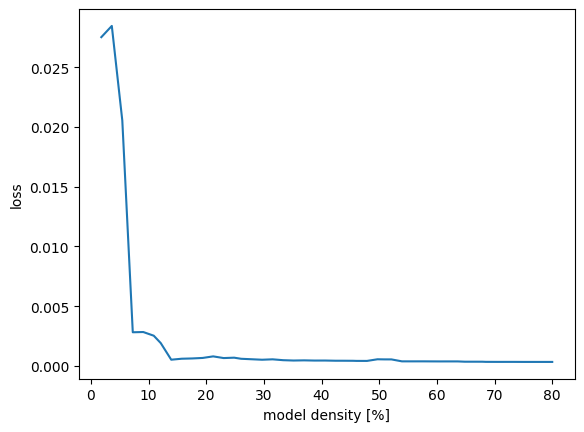

In [19]:
#print and plot results

print("model ID\t\t\tdensity[%]\t\t\tloss")

density = []
for i in range(models.shape[0]):
    density_ = 100*(numpy.abs(models[i]) > 10**-5).sum()/(models.shape[1]*models.shape[2])
    density.append(density_)
    print(i, "\t\t\t\t", round(density_, 1), "\t\t\t\t", loss[i])


plt.cla()
plt.clf()
plt.xlabel("model density [%]")
plt.ylabel("loss")
plt.plot(density, loss)

print(models[-1])

'''
plt.cla()
plt.clf()
plt.imshow(models[3].T , cmap = 'magma' )
plt.colorbar()
'''



In [20]:
#split model to system dynamics matrices a, b

model = models[7]

ab      = model.T
order   = x_batch.shape[1]
a = ab[:, 0:order]
b = ab[:, order:]


#print("ground truth = ")
#print(numpy.round(ds.mat_a, 3))
#print(numpy.round(ds.mat_b, 3))

print("\n\n\n")

print("model = ")
print(numpy.round(a, 5))
print(numpy.round(b, 5))





model = 
[[ 0.       0.       0.     ]
 [ 0.       0.       0.     ]
 [ 0.11889 -0.19971  0.     ]]
[[ 0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.05004  0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.05
   0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.04952  0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.04954  0.
   0.       0.       0.    